In [3]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

# from tsfresh.feature_extraction.feature_calculators import *

In [4]:
# Set plot theme
# plt.style.use('ggplot')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '262629'
plt.rcParams['figure.facecolor'] = '262629'

In [25]:
dataset = pd.read_csv('../data/ExoTrain.csv')
# dataset = pd.read_csv('../data/eTest.csv')
X = pd.DataFrame(np.load('../datasets/raw_normalized_dataset_X.npy'))

In [26]:
y = dataset['LABEL']-1
# X = dataset.drop(['LABEL'], axis=1)

In [20]:
def plot_series(series, title, figsize=(15, 5), xlabel=None, ylabel=None, mode='o'):
    
    median = np.median(series)
    std = np.std(series)
    plt.figure(figsize=figsize)
    plt.plot(series,mode, markersize=3)
#     plt.plot((median+3*std)*np.ones(len(series)), '-')
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.show()
    
def plot_2(i, j, title):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(2, 1, 1)
    plt.plot(i, 'o', markersize=2)
    plt.title(title)
    ax.set_yticklabels([])
    ax = plt.subplot(2, 1, 2)
    plt.plot(j, 'o', markersize=2)
    ax.set_yticklabels([])
    
    plt.show()


In [7]:
false_indexes = np.where(y==0)[0]
true_indexes = np.where(y==1)[0]


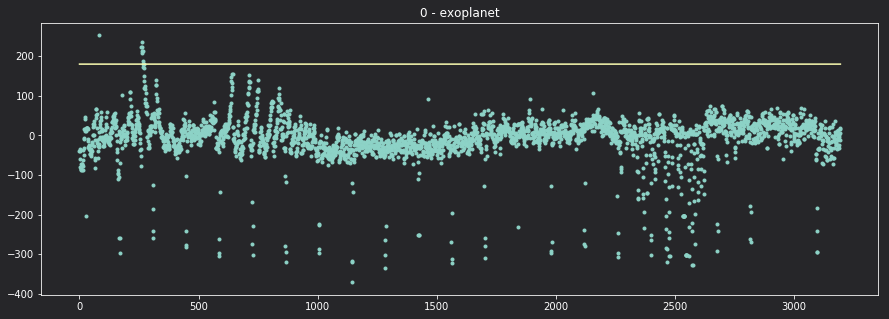

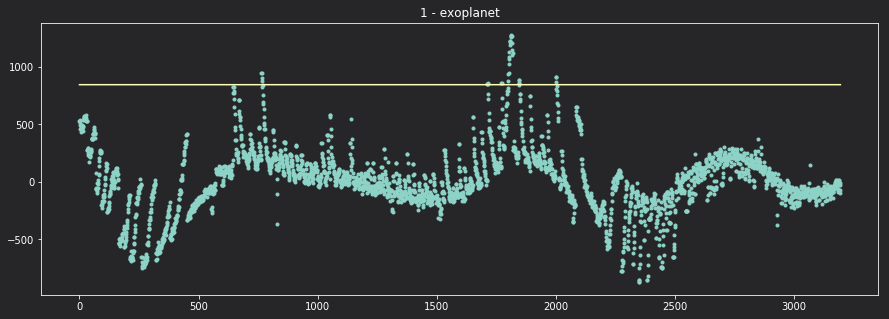

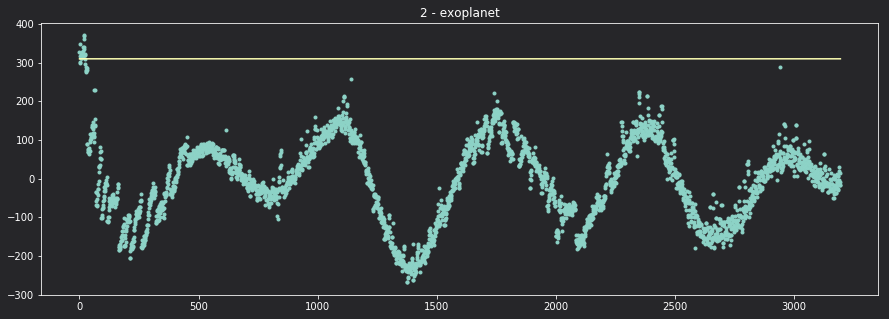

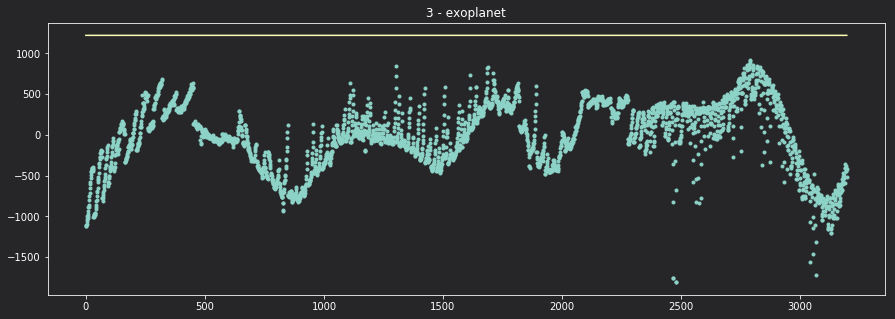

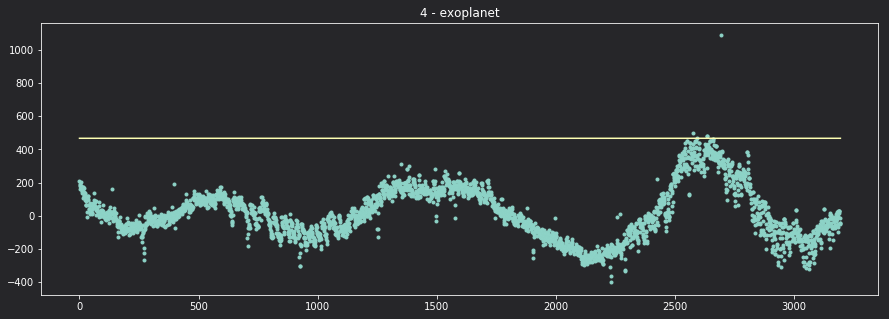

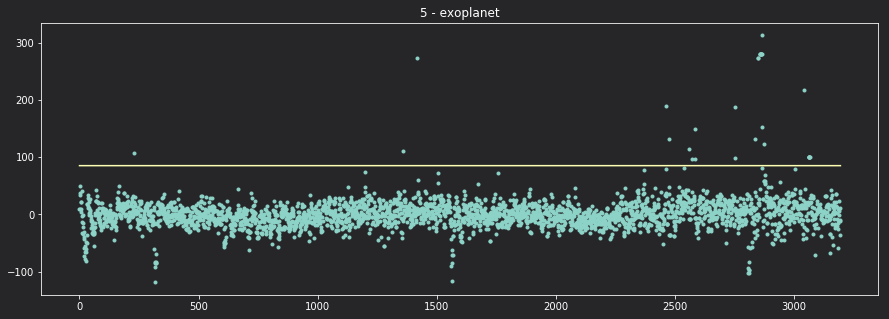

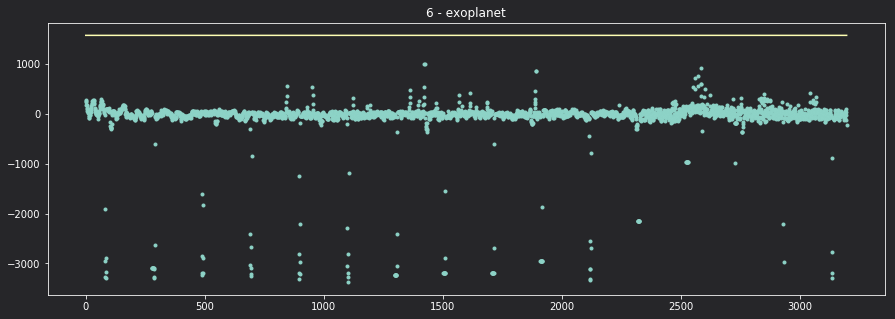

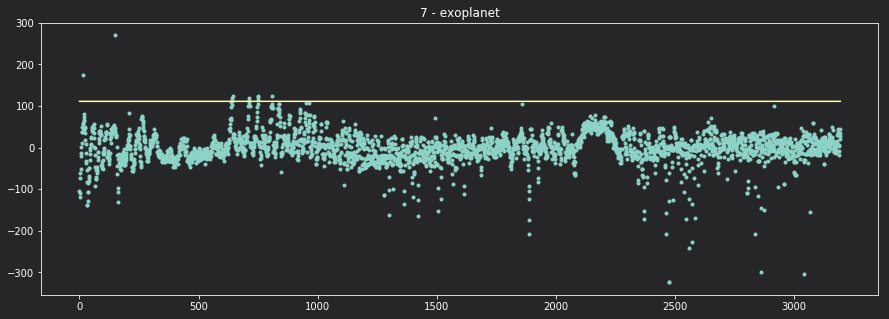

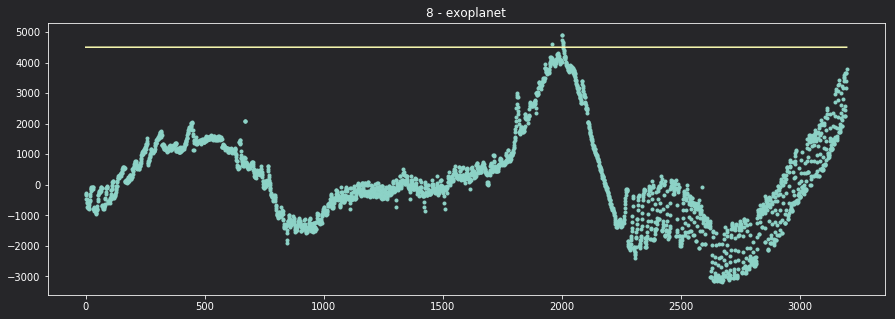

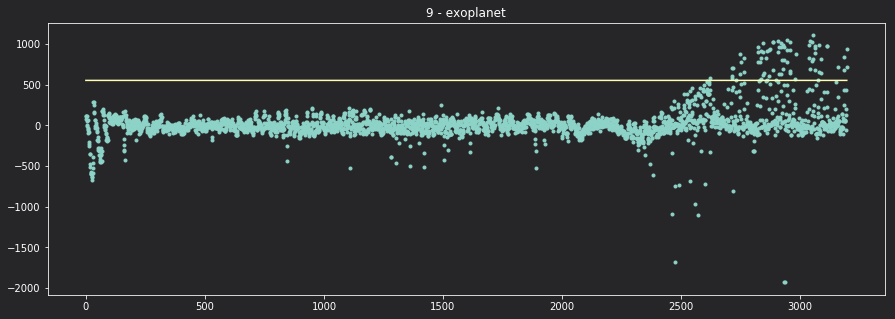

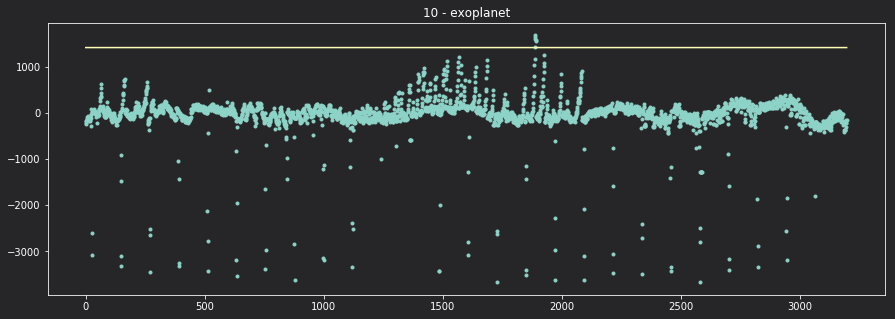

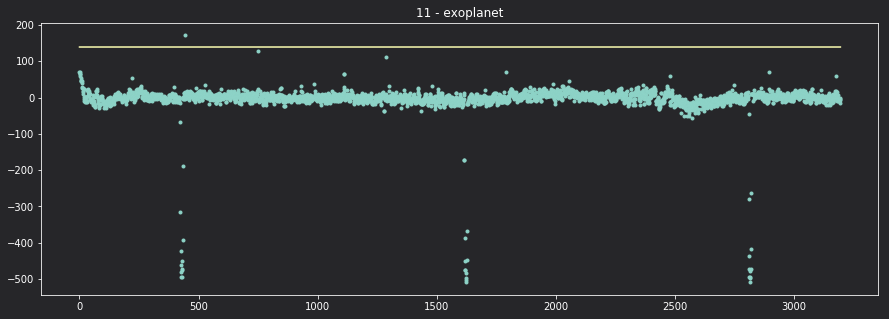

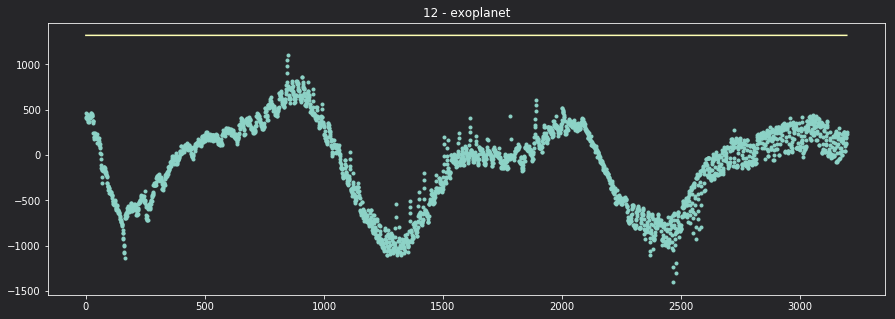

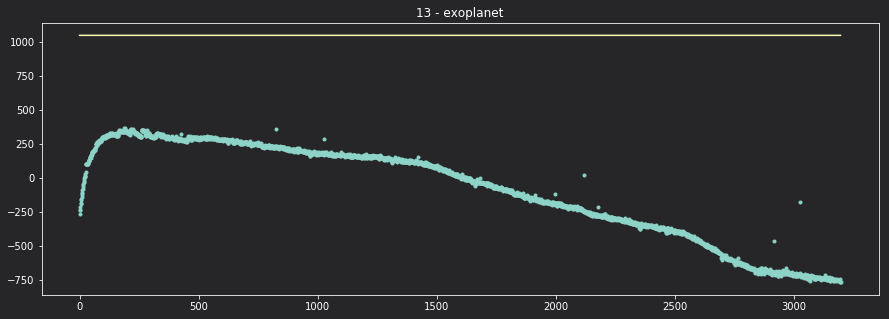

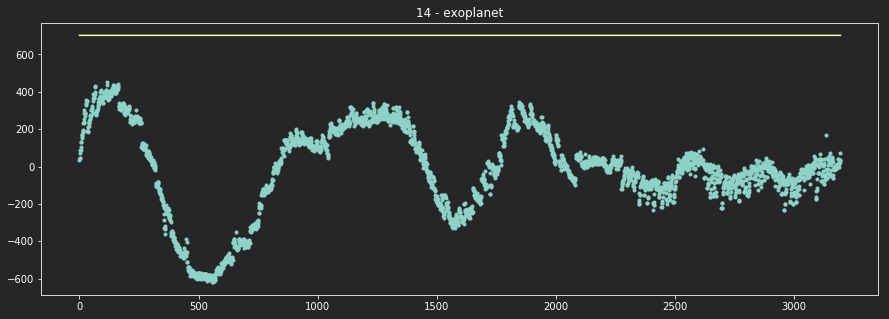

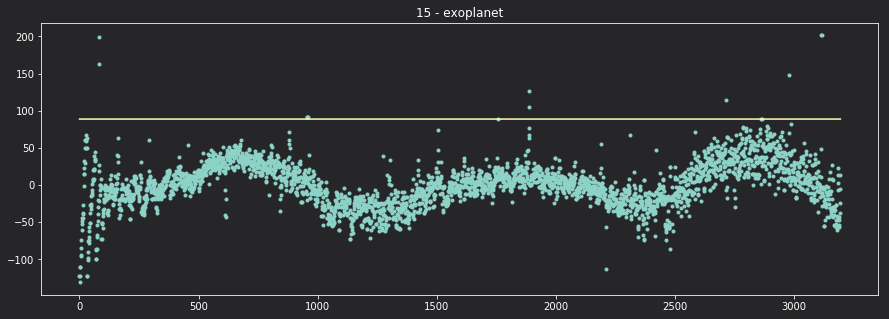

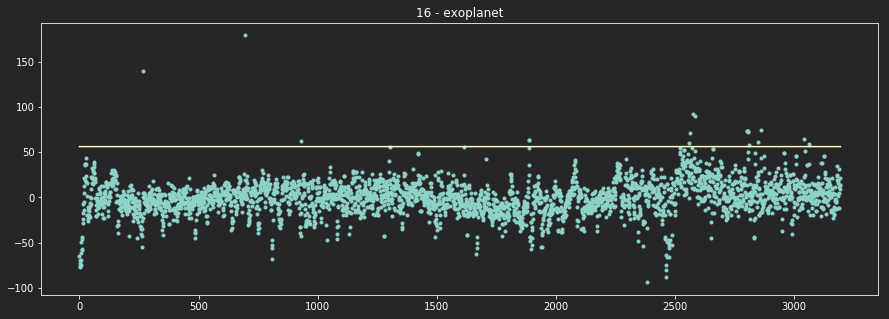

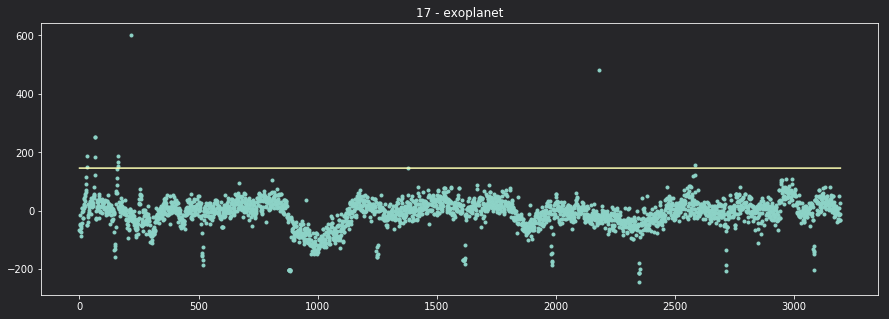

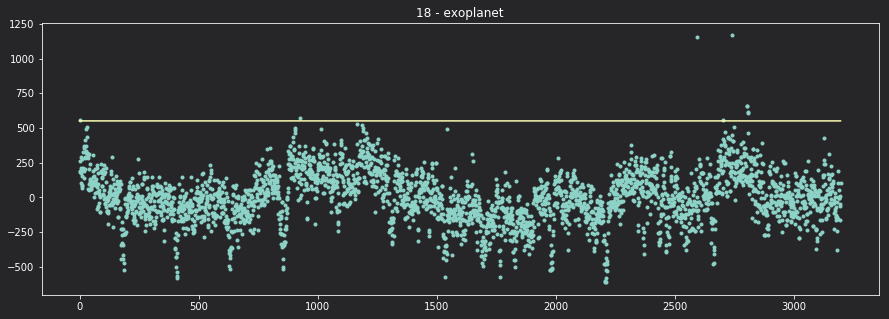

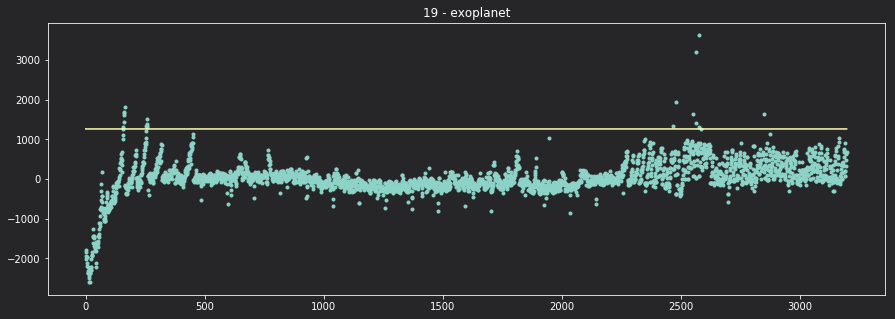

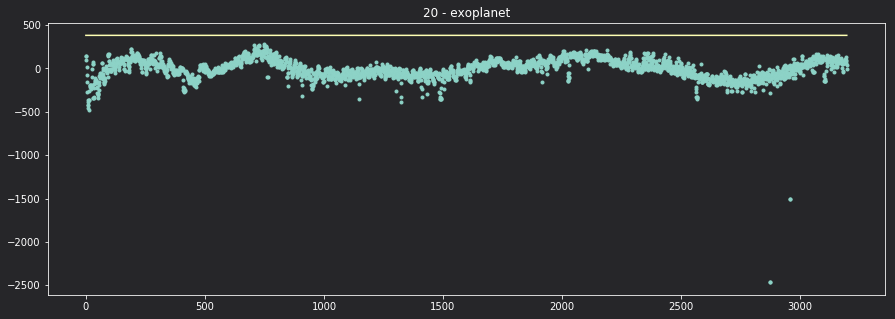

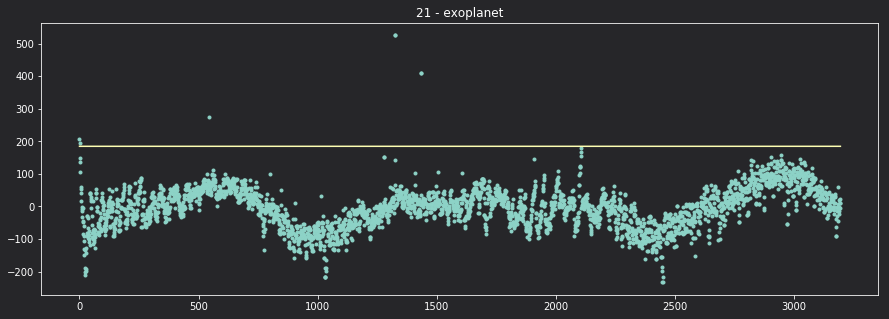

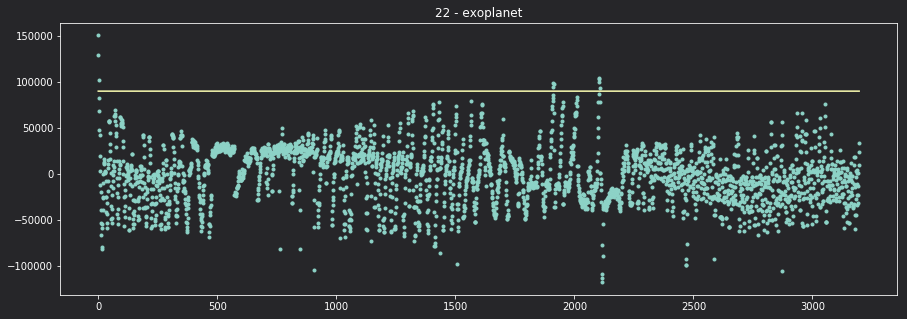

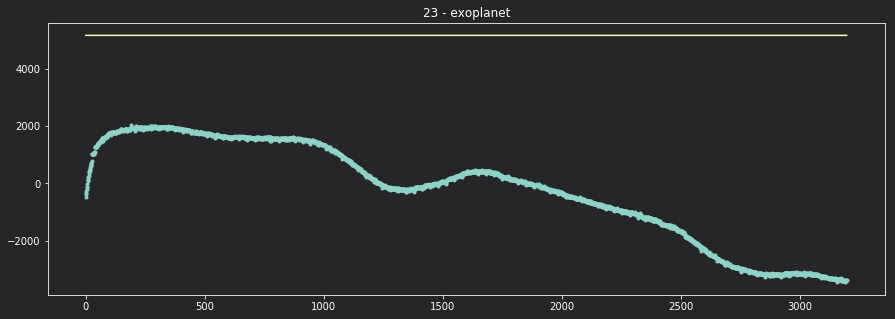

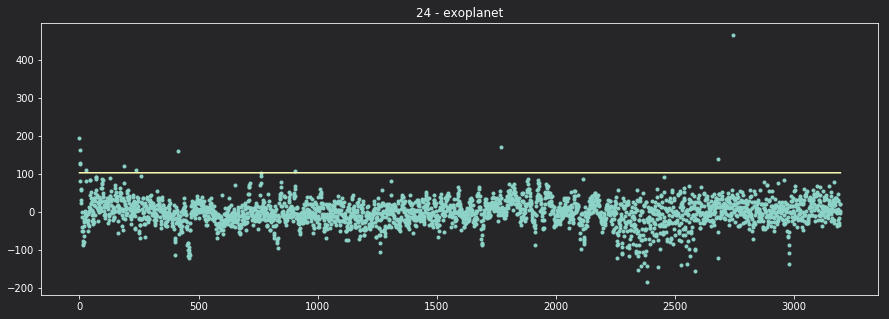

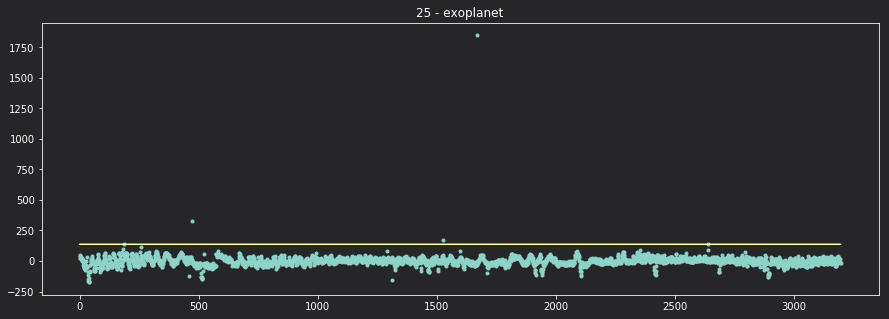

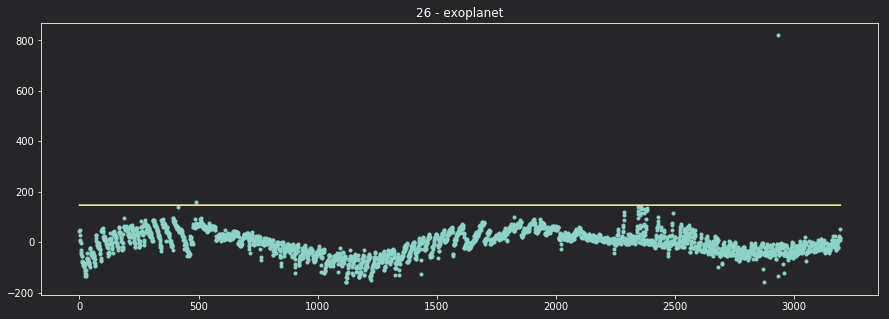

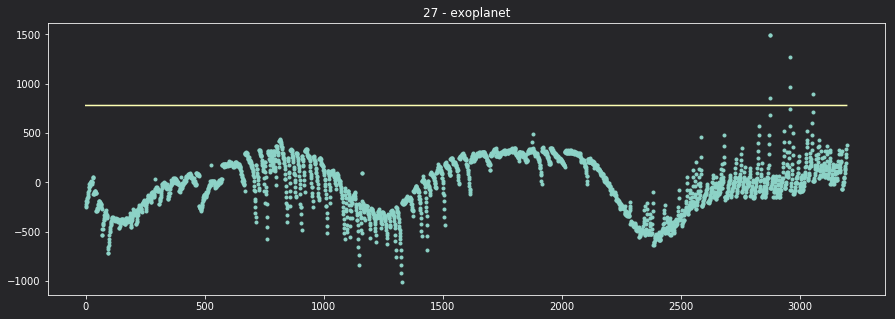

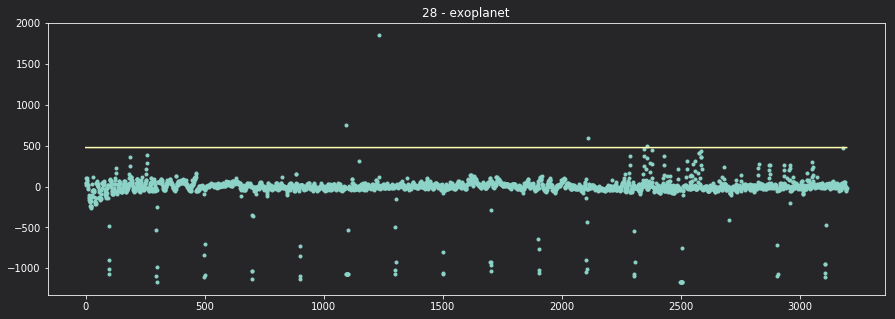

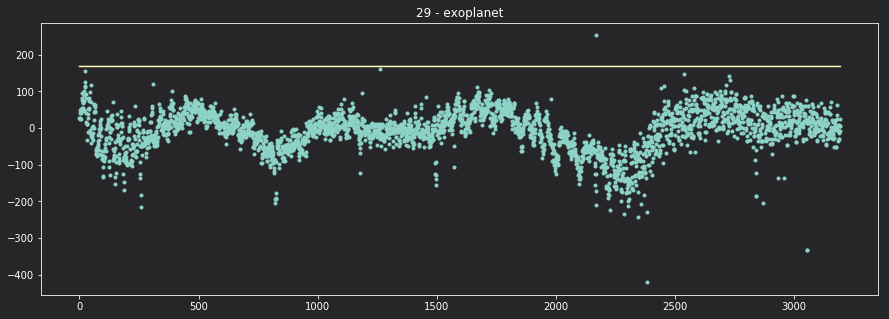

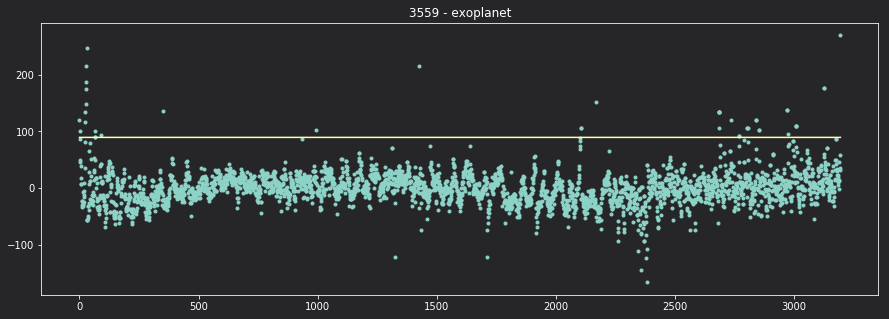

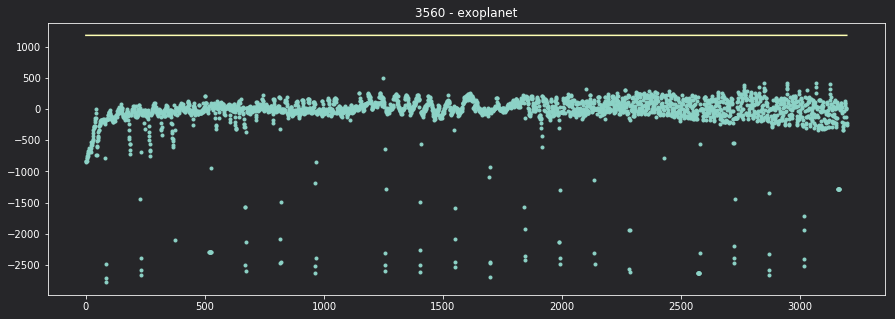

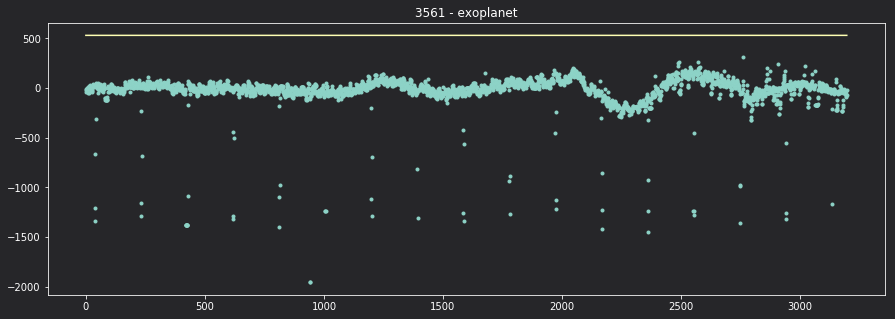

In [8]:
for i in true_indexes: #ue(20, 50)
    plot_data = X.iloc[i]
    exoplanet_val = y.iloc[i]
    plot_data = plot_data.values
    plot_series(plot_data, "%d - "%i + ('exoplanet' if exoplanet_val == 1 else "not exoplanet"))


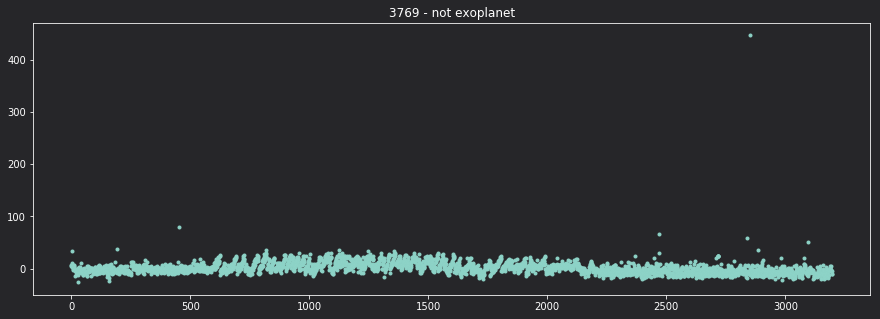

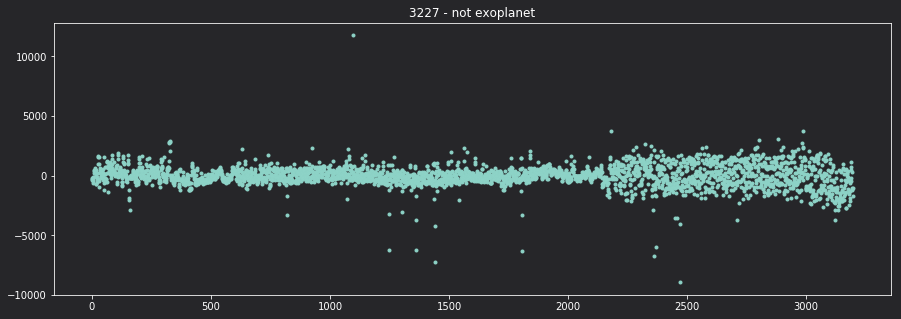

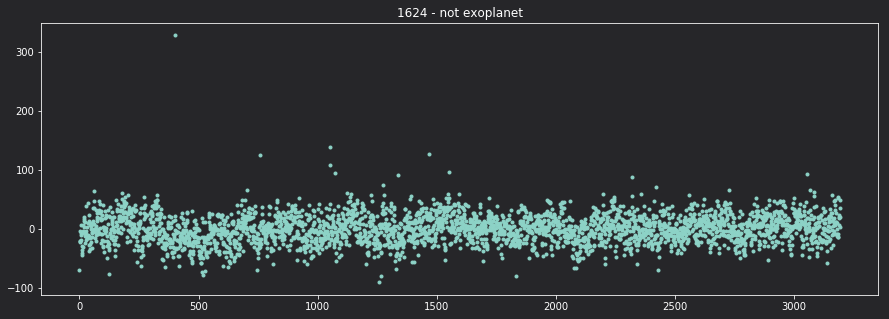

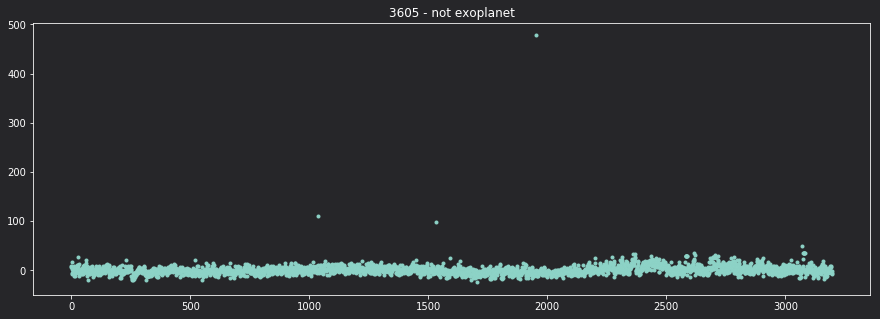

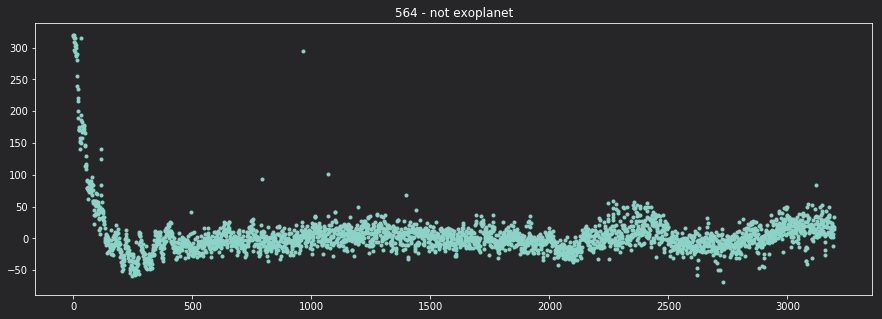

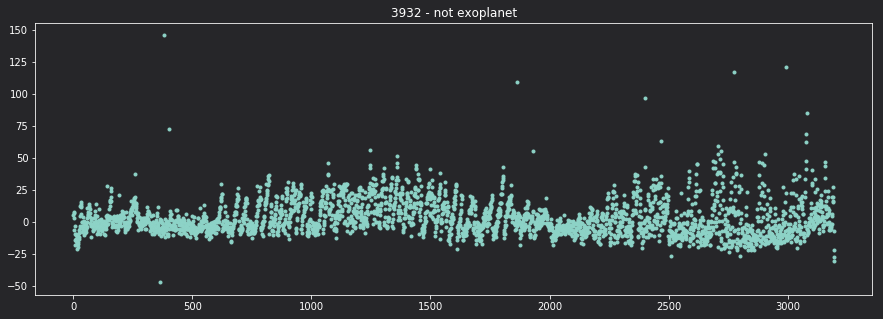

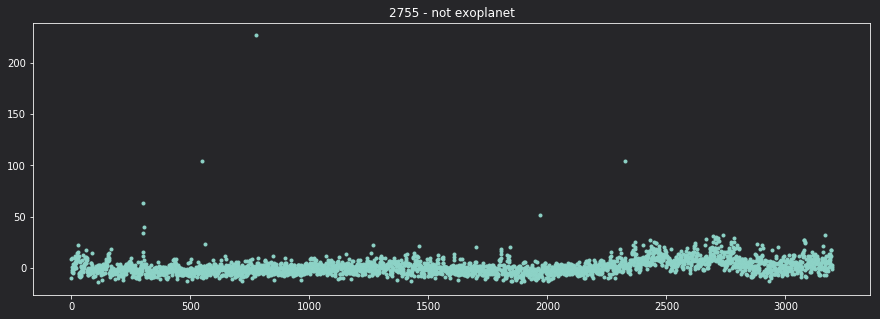

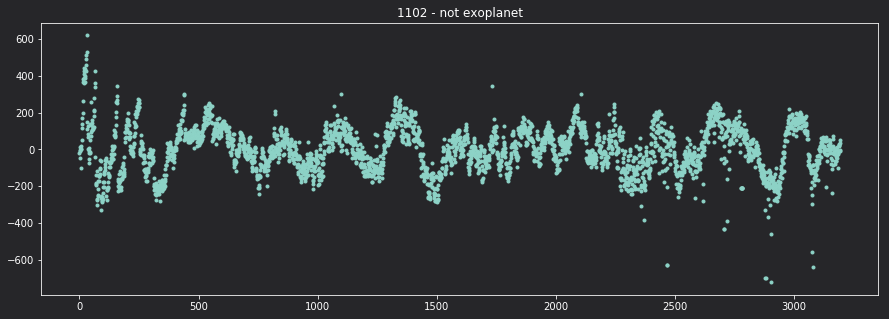

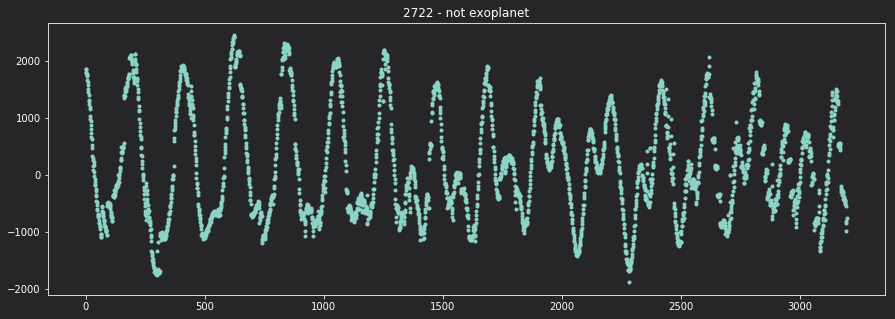

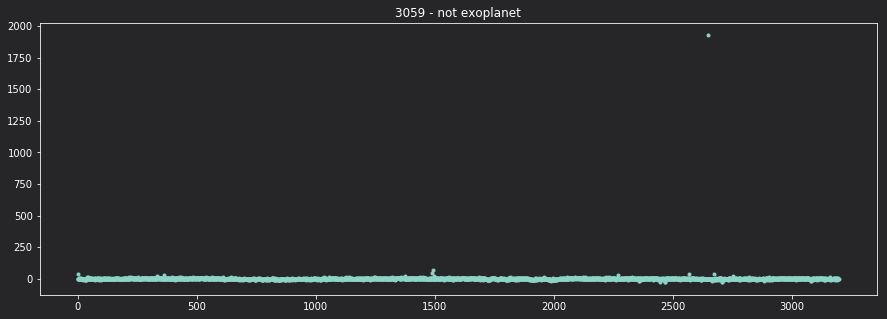

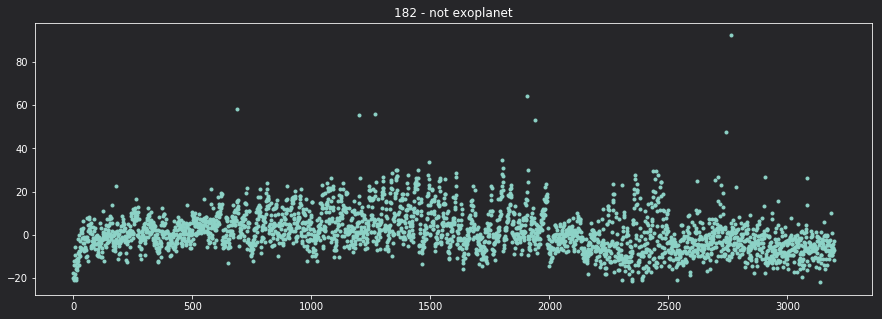

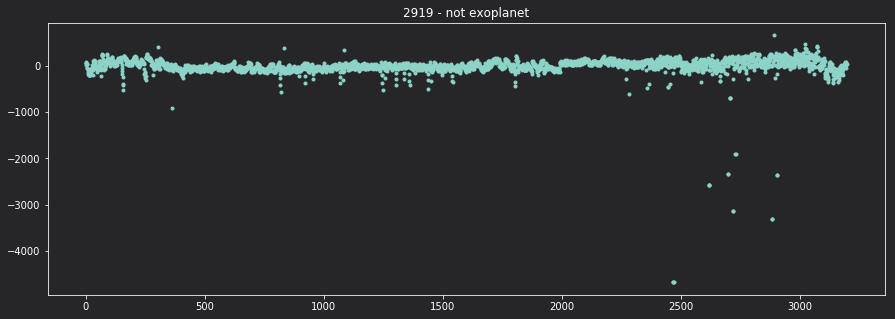

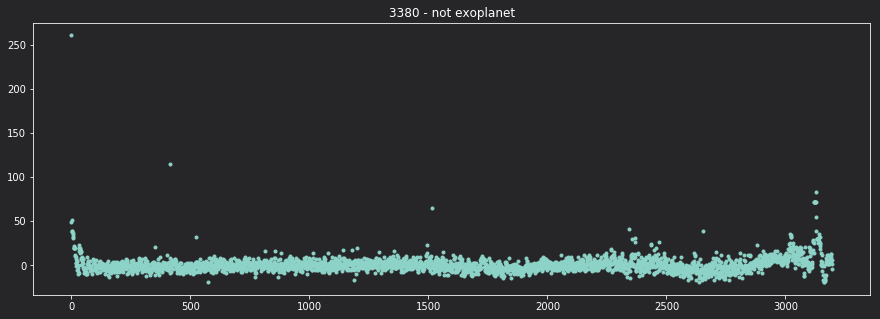

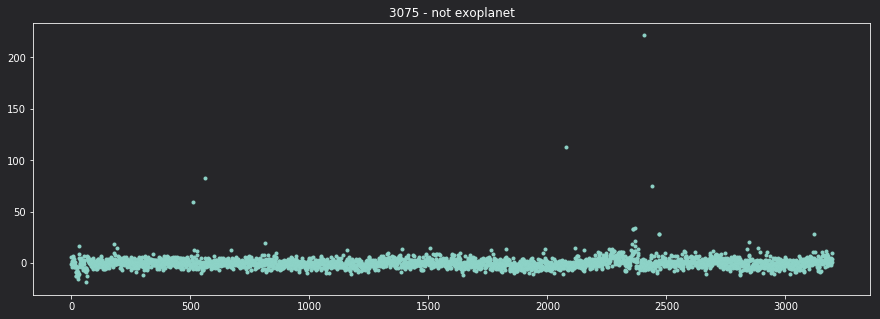

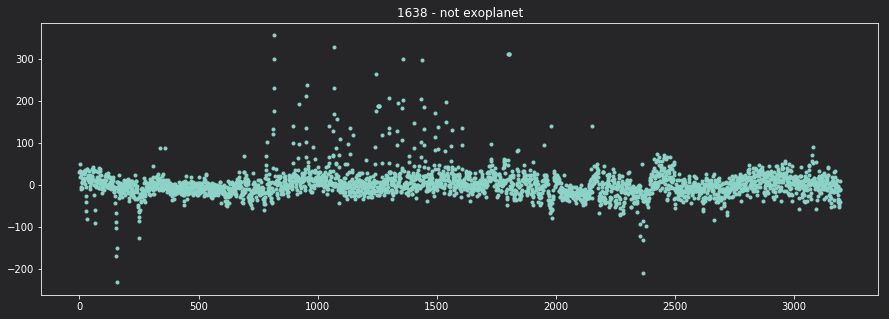

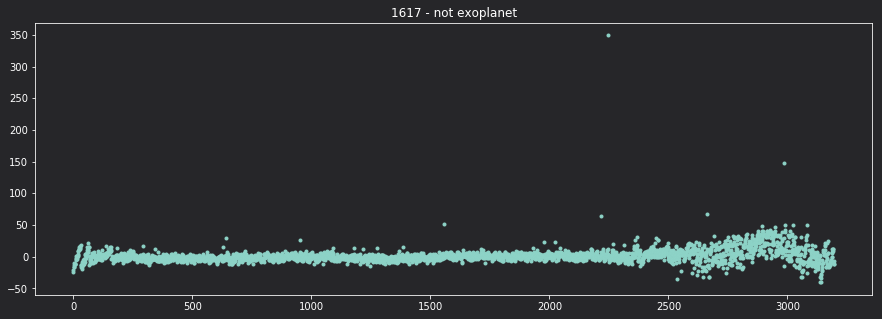

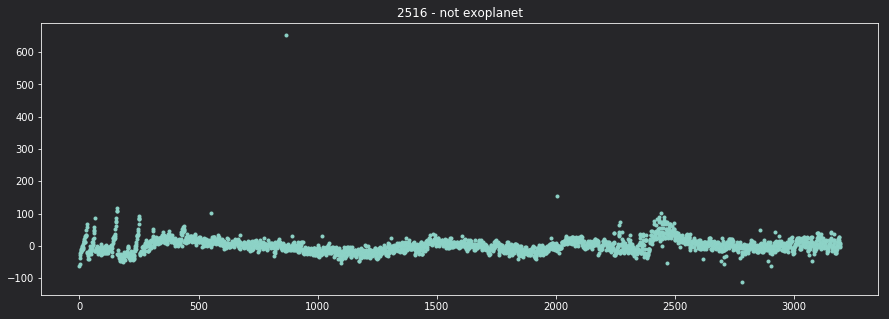

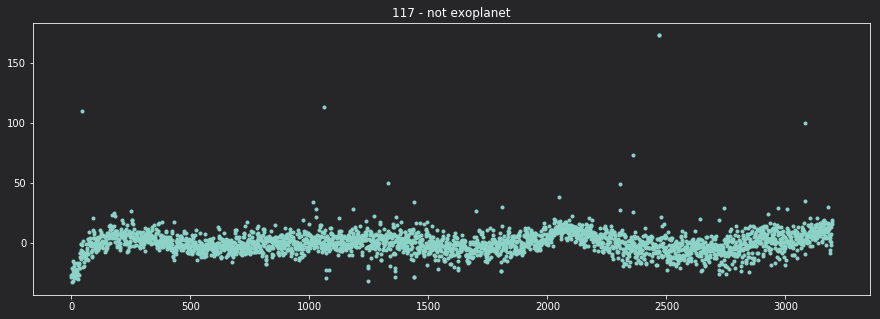

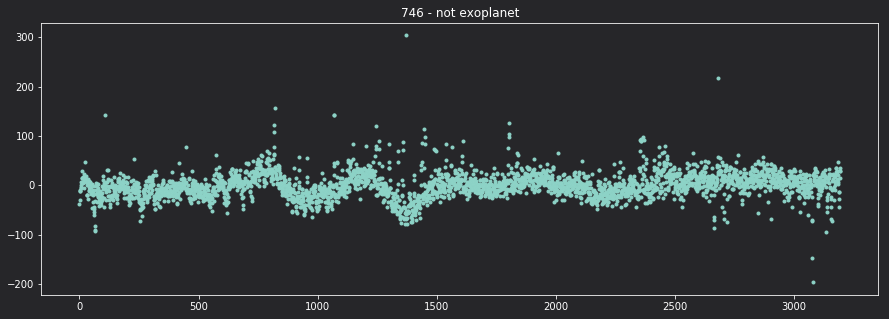

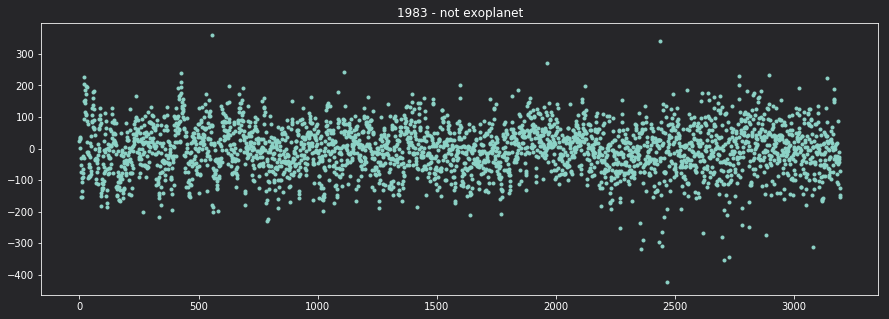

In [19]:
np.random.shuffle(false_indexes)
for i in false_indexes[:20]: #range(20, 50)
    plot_data = X.iloc[i]
    exoplanet_val = y.iloc[i]
    plot_data = plot_data.values
    plot_series(plot_data, "%d - "%i + ('exoplanet' if exoplanet_val == 1 else "not exoplanet"))


## Fourier Transform and Features
- Fourier transform on the data
- Noise Cancellation in the data
- Fourier features

In [10]:
from scipy import signal
from scipy import ndimage
from scipy.ndimage.filters import uniform_filter1d
from scipy.signal import medfilt 
from scipy.fftpack import fft, ifft

In [11]:
i = 1529
k = X.iloc[i].values
k = (k-k.mean())/k.std()
print "exoplanet" if y.iloc[i] == 1 else "not-exoplanet" 

not-exoplanet


In [ ]:
for i in true_indexes[:10]:
# for i in [4,8,27,13]:
    k = X.values[i]
    kt = ndimage.filters.gaussian_filter1d(k, sigma=10)
    # k_uniform = uniform_filter1d(k, axis=0, size=100)
    # k_ewma = pd.ewma(k, 10)
    kdiff = k-kt
    # kdiff_uniform = k-k_uniform
    # kdiff_ewma = k-k_ewma

    k_med = medfilt(k, kernel_size=41)
    kdiff_med = k-k_med


    plot_series(np.stack([k, k_med]).transpose(), "Original Series with median")
    plot_series(np.stack([k, kt]).transpose(), "Original Series with gaussian")
    # plot_series(np.stack([k, k_uniform]).transpose(), "Original Series with uniform filter")
    # plot_series(kt, "Smoothed Series")
    # plot_series(kdiff_uniform, "Difference o-uniform")
    # plot_series(kdiff_ewma, "Difference o-exp")
#     plot_2(np.stack([k,k_med]).transpose(), kdiff_med, "Median Smoothing")
#     plot_2(np.stack([k,kt]).transpose(), kdiff, "Gaussian Smoothing")
    plot_series(kdiff, "Difference o-gaussian")
#     plot_series(X_detrend_median81[i], "Difference o-median 81")
    plot_series(kdiff_med, "Difference o-_median")
    # plot_series(kt, "Gaussian Smoothed Series")
    # plot_series(k_uniform, "Smoothed Uniform Filter Series")
    # plot_series(k_med, "Median Filter Filter Series")
    # plot_series(k_ewma, "Smoothed Exp Filter Series")

In [ ]:
# plot_series(kfft.real, "Difference FFT Real")
# plot_series(kfft.imag, "Difference FFT Imag")
plot_series(np.abs(fft(k)), "Actual Waveform FFT")
# plot_series(np.abs(fft(kdiff_ewma)), "Difference o-exp Waveform FFT")
plot_series(np.abs(fft(kdiff)), "Difference FFT Abs")
# plot_series(np.abs(fft(kdiff_uniform)), "Difference o-Uniform200 Waveform FFT")
plot_series(np.abs(fft(kdiff_med)), "Difference o-Median200 Waveform FFT")
plot_series(np.abs(fft(kt)), "Smoothed Waveform FFT")
# plot_series(np.abs(fft(k_uniform)), "Smoothed Uniform 200 Waveform FFT")
# plot_series(np.abs(fft(k_ewma)), "Smoothed Exp 200 Waveform FFT")
plot_series(np.abs(fft(k_med)), "Smoothed Median200 Waveform FFT")


In [21]:
# pcorr = dict(partial_autocorrelation(k, [{"lag": a} for a in range(1001)])).values()
# plot_series(pcorr, 'partial corr')

In [64]:
k

array([  9.34,  49.96,  33.3 , ..., -11.77,  -9.25, -36.69])

In [72]:
%timeit auto_corr = [autocorrelation(k, i) for i in range(len(k))]

1 loop, best of 3: 273 ms per loop


In [ ]:
plot_series(k, 'Original Data')
plot_series(kdiff, 'Original Data')
plot_series(auto_corr, 'Autocorrelation Coeff')

In [354]:
kfft_abs = np.abs(kfft)

In [360]:
X.transpose().describe()

,0,1,2,3,4,5,6,7,8,9,...,3950,3951,3952,3953,3954,3955,3956,3957,3958,3959
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,...,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.00000,3197.000000,3197.000000,3197.000000,3197.000000
mean,-7.427932,8.189087,-4.646587,-14.240660,18.015580,1.267789,-88.620873,0.059118,209.115934,17.659878,...,-1.933804,3.477072,-3.838724,-6.385586,1.933447,1.49700,1.539008,5.661786,7.892934,1.489643
std,60.011024,281.876484,103.238723,407.121292,155.684307,28.395814,526.600673,37.116934,1501.426313,184.593380,...,19.628796,18.999690,222.194952,122.487607,83.799917,64.01637,53.130731,156.811527,182.049247,16.724832
min,-371.270000,-874.950000,-268.410000,-1808.760000,-402.600000,-118.860000,-3382.640000,-324.050000,-3198.720000,-1931.670000,...,-73.330000,-54.260000,-959.970000,-3930.120000,-269.670000,-20.36000,-79.870000,-530.970000,-2267.040000,-65.560000
25%,-25.180000,-129.670000,-78.190000,-268.090000,-89.370000,-11.970000,-45.470000,-18.190000,-722.970000,-46.780000,...,-12.330000,-8.750000,-174.730000,-25.260000,-45.490000,-2.90000,-7.220000,-98.320000,-107.660000,-6.780000
50%,0.010000,-0.080000,-0.010000,0.020000,-0.020000,0.000000,-0.050000,0.020000,1.090000,-0.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,21.430000,158.310000,69.520000,315.400000,122.850000,12.490000,37.880000,19.730000,1131.160000,50.580000,...,9.040000,14.920000,157.380000,25.820000,41.950000,3.00000,7.250000,104.780000,103.480000,7.440000
max,252.640000,1274.590000,370.290000,924.320000,1087.880000,312.800000,1001.700000,269.970000,4892.720000,1107.620000,...,133.000000,270.360000,1135.110000,898.710000,1373.810000,3607.23000,2375.240000,776.000000,569.680000,223.000000


In [432]:
l = X.iloc[:, 1:]

In [467]:
k = l.ewm(span=100, axis=1).mean()

In [538]:
plot_series(k.iloc[1].values, "random")

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
plot_series(k.iloc[1].values, '1')

In [33]:
import pywt

In [34]:
i = 17
k = X.iloc[i].values
xa, xb = pywt.dwt(X.values, 'db2')

In [35]:
k==X.values[i]

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [42]:
pywt.cwt??

In [47]:
b.shape

(1,)

In [ ]:
for i in true_indexes:
    k = X.values[i]
    a,b = pywt.dwt(k, 'db2')
    plot_series(k, "orig")
#     plot_series(a, 'a', mode='-')
    plot_series(b, 'b', mode='-')
# plot_series(X.values[i], 'orig')
# plot_series(xa[i], 'xa_i')
# plot_series(xb[i], 'xb_i')


# a,b = pywt.cwt(k,1, 'morl')
# plot_series(k, "orig", mode='-')
# plot_series(a.flatten(), 'a', mode='-')
# plot_series(b, 'b')

## Visualizations for peak features

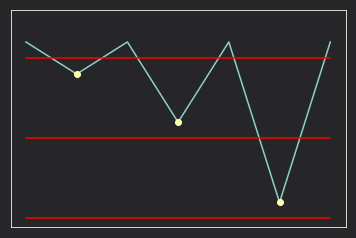

In [32]:
points = [0, -1, 0, -2.5, 0, -5, 0]
line = np.ones(7)
plt.plot(points)
plt.plot([1, 3, 5], [-1, -2.5, -5], 'o')
plt.plot(-0.5*line, 'r')
plt.plot(-3*line, 'r')
plt.plot(-5.5*line, 'r')
ax = plt.axes()
ax.set_ybound(upper=1)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks(ticks=[])
ax.set_yticks(ticks=[])
plt.show()